# 군집(Clustering)

##### 1. K-means

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

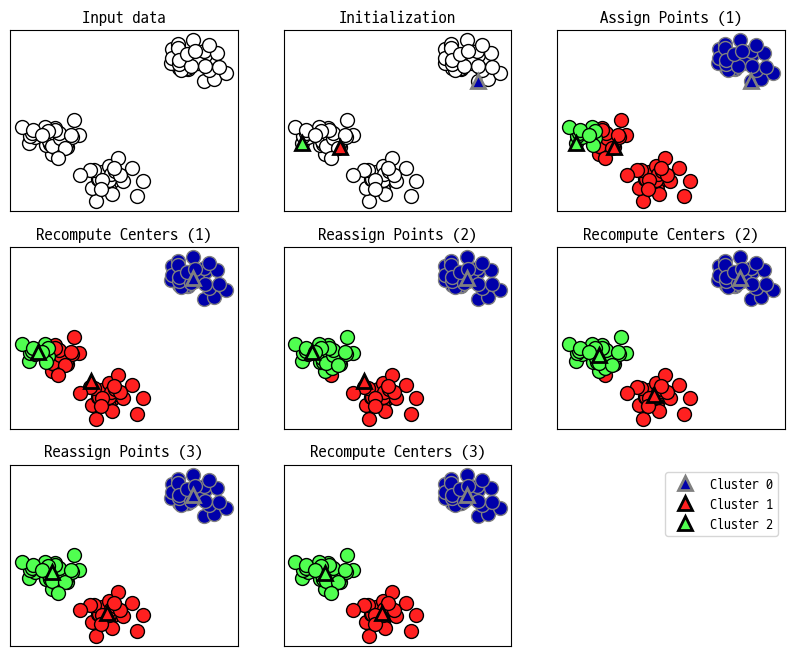

In [3]:
mglearn.plots.plot_kmeans_algorithm()

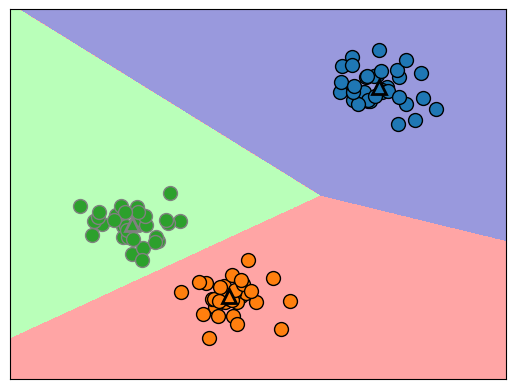

In [4]:
mglearn.plots.plot_kmeans_boundaries()

##### 실습. 인위적인 datasets - k-means로 학습하기

In [12]:
X, y = datasets.make_blobs(n_samples=100, random_state=42)
print(X.shape, y.shape, np.unique(y))

# k-means
kmeans = KMeans(n_clusters=3).fit(X)

(100, 2) (100,) [0 1 2]


In [17]:
print(kmeans.labels_)
print(y)
print(y == kmeans.labels_)
print(np.mean(y == kmeans.labels_))
print(kmeans.predict(X))

[0 1 2 1 0 1 2 1 1 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 2 1 0 0 0 0 1 1 0 2 2 2
 2 1 1 0 2 1 2 2 1 0 0 0 1 1 1 2 0 0 0 2 2 1 2 0 1 0 1 0 0 1 0 1 1 1 0 0 2
 1 0 1 0 1 1 2 1 2 0 2 2 2 1 2 1 1 1 2 1 2 2 2 1 0 2]
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
[False  True False  True False  True False  True  True False False False
 False False False False False False False False False False False False
 False False  True False False False False  True  True False False False
 False False  True  True False False  True False False  True False False
 False  True  True  True False False False False False False  True False
 False  True False  True False False  True False  True  True  True False
 False False  True False  True False  True  True False  True False False
 False False False  True False  True  True  True False  True False False
 False  

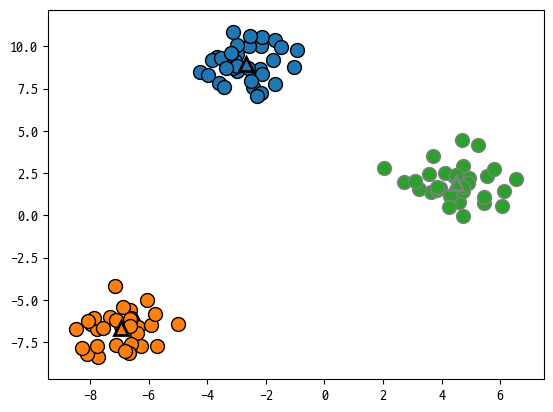

In [22]:
# 시각화
kmeans = KMeans(n_clusters=3).fit(X)
label3 = np.unique(kmeans.labels_)
label3
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0]
                       , kmeans.cluster_centers_[:,1]
                       , label3, markers='^', markeredgewidth=2)

plt.show()

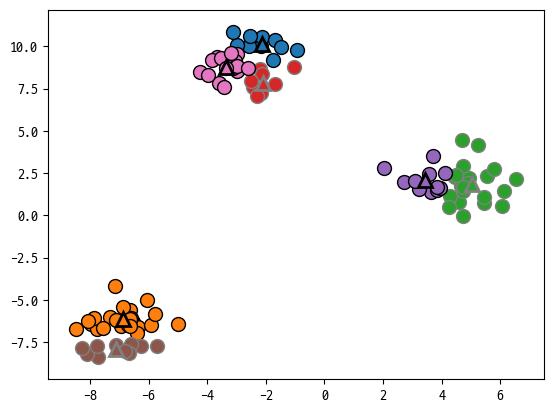

In [24]:
kmeans = KMeans(n_clusters=7).fit(X)
label3 = np.unique(kmeans.labels_)
label3
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0]
                       , kmeans.cluster_centers_[:,1]
                       , label3, markers='^', markeredgewidth=2)

plt.show()

##### 실습. iris - k-means

In [45]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns = iris.feature_names
X.head()
y.columns = ['Targets']
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


In [56]:
colormap[y.Targets]

TypeError: list indices must be integers or slices, not Series

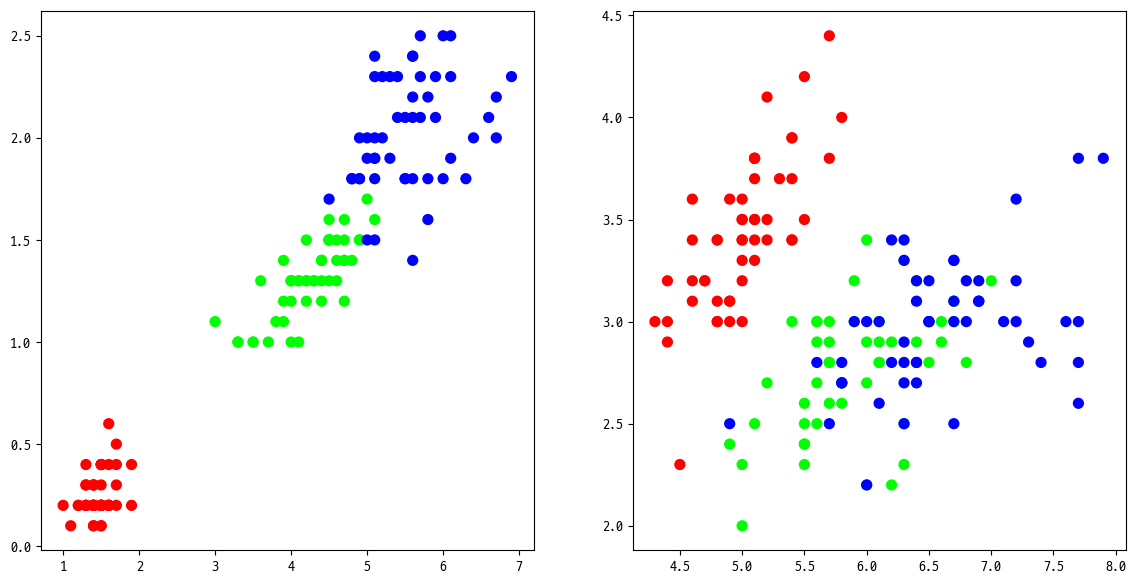

In [58]:
# 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'blue'])
plt.subplot(121)
plt.scatter(X['petal length (cm)'], X['petal width (cm)']
            , s=50, c=colormap[y.Targets])
plt.subplot(122)
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)']
            , s=50, c=colormap[y.Targets])
plt.show()

In [61]:
# 기계학습
kmeans = KMeans(n_clusters=3).fit(X)
print(list(y.Targets))
print(kmeans.labels_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


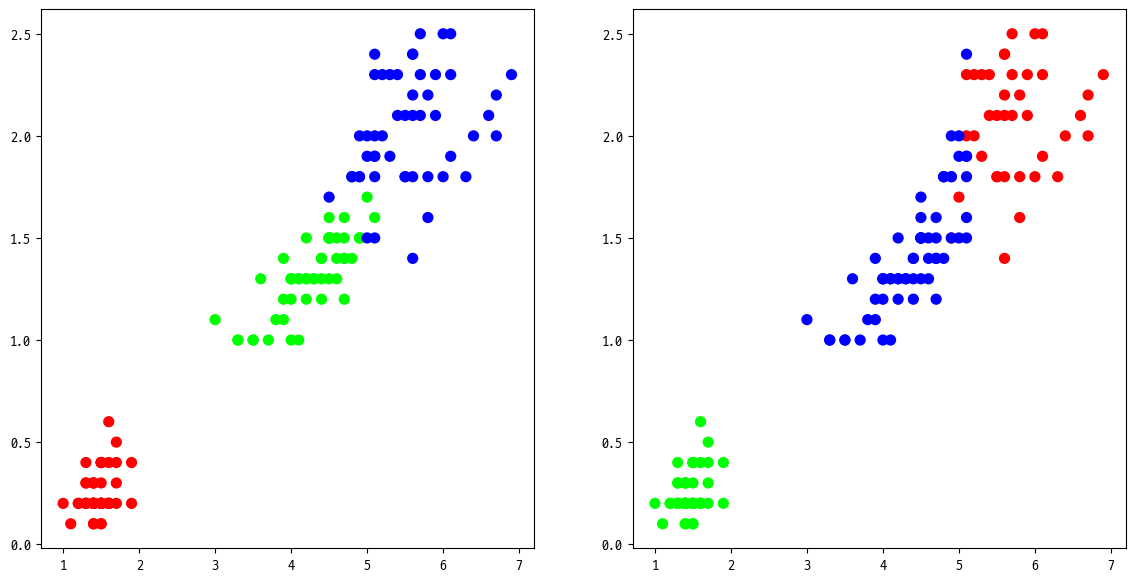

In [62]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'blue'])
plt.subplot(121)
plt.scatter(X['petal length (cm)'], X['petal width (cm)']
            , s=50, c=colormap[y.Targets])
plt.subplot(122)
plt.scatter(X['petal length (cm)'], X['petal width (cm)']
            , s=50, c=colormap[kmeans.labels_])
plt.show()

In [63]:
# y : 0,1,2 vs k-means : 1,2,0
y_pred = np.choose(kmeans.labels_, [2, 0, 1])
print(kmeans.labels_)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


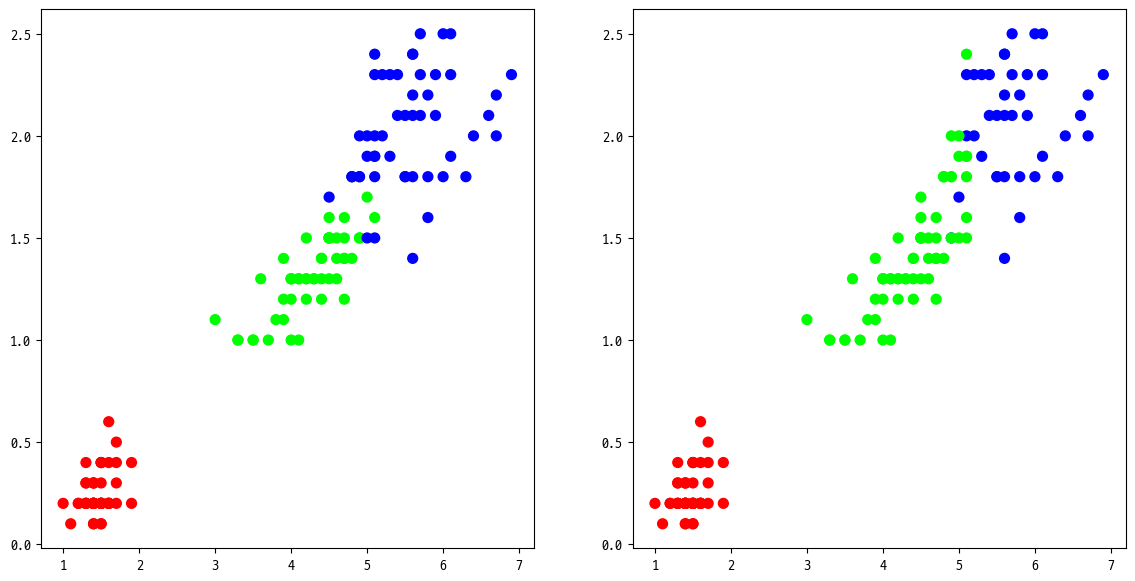

In [64]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'blue'])
plt.subplot(121)
plt.scatter(X['petal length (cm)'], X['petal width (cm)']
            , s=50, c=colormap[y.Targets])
plt.subplot(122)
plt.scatter(X['petal length (cm)'], X['petal width (cm)']
            , s=50, c=colormap[y_pred])
plt.show()

In [65]:
print(f'k-means 모델의 정확도 {kmeans.score(X)}')

k-means 모델의 정확도 -78.85144142614601


In [71]:
import sklearn.metrics as sm

print(f'k-means 모델의 정확도(정답변환전) {sm.accuracy_score(y, kmeans.labels_):.3f}')
print(f'k-means 모델의 정확도(정답변환후) {sm.accuracy_score(y, y_pred):.3f}')

k-means 모델의 정확도(정답변환전) 0.093
k-means 모델의 정확도(정답변환후) 0.893


##### 실습. cancer - k-means

In [82]:
cancer = datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [83]:
X = pd.DataFrame(cancer.data)
X.rename(columns={0:'mean_radius', 2:'mean_perimeter'
             , 20:'worst_radius', 22:'worst_perimeter'}, inplace=True)
X = X[['mean_radius', 'mean_perimeter', 'worst_radius', 'worst_perimeter']]
X.head()
y = pd.DataFrame(cancer.target)
y.columns = ['Targets']
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


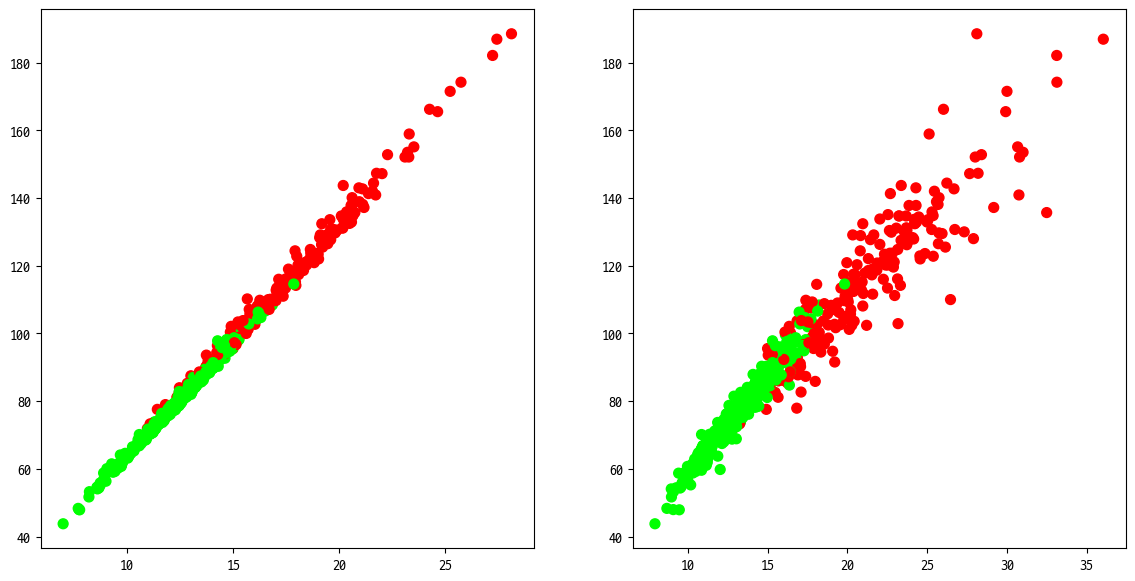

In [85]:
# 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(121)
plt.scatter(X.mean_radius, X.mean_perimeter, c=colormap[y.Targets], s=50)
plt.subplot(122)
plt.scatter(X.worst_radius, X.mean_perimeter, c=colormap[y.Targets], s=50)
plt.show()

In [89]:
kmeans = KMeans(n_clusters=2).fit(X)
print(list(y.Targets))
print(kmeans.labels_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

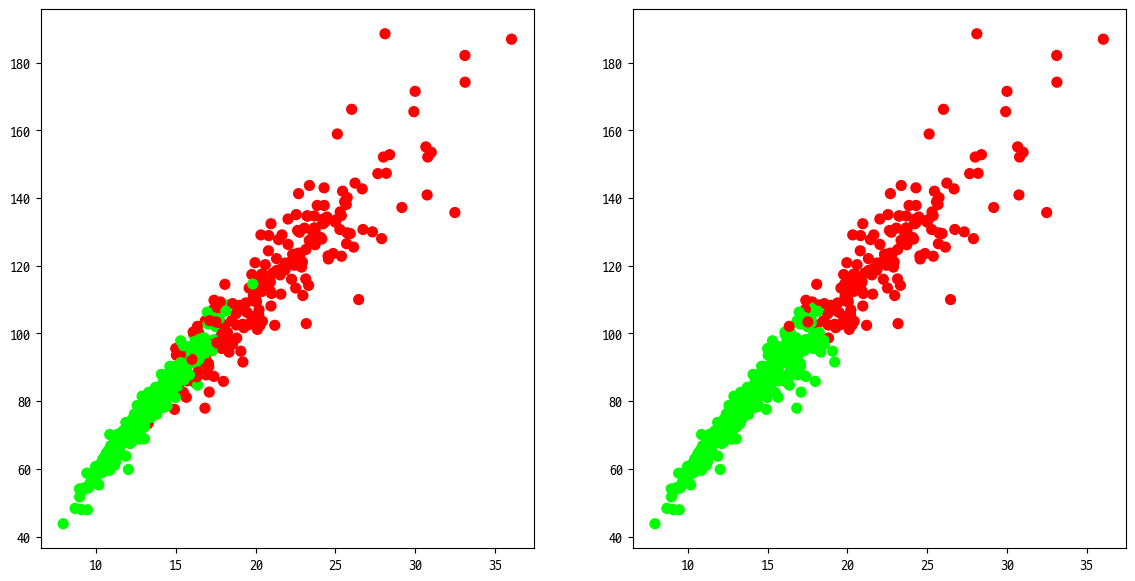

In [91]:
y_pred = np.choose(kmeans.labels_, [1, 0])

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(121)
plt.scatter(X.worst_radius, X.mean_perimeter, c=colormap[y.Targets], s=50)
plt.subplot(122)
plt.scatter(X.worst_radius, X.mean_perimeter, c=colormap[y_pred], s=50)
plt.show()

In [92]:
print(f'k-means의 정확도 = {sm.accuracy_score(y, y_pred):.3f}')

k-means의 정확도 = 0.888


In [96]:
# 분류결과표
sm.confusion_matrix(y, y_pred)

array([[150,  62],
       [  2, 355]], dtype=int64)